In [386]:
import xml.etree.ElementTree as ET

In [490]:
tree = ET.parse('D:/data9.xml')
root = tree.getroot()

In [388]:
print((root[0][0].text)) #year
print((root[0][1].text)) #month

2019
4


In [389]:
year=[]
month=[]
counts=[]
temAverage=[]
temMin=[]
temMax=[]
DailyPrecipitation=[]
windSpeedMax=[]
windSpeedAverage=[]
dewPointTemperatureAverage=[]
relativeHumidityAverage=[]
InsolationSum=[]
TotalcloudAverage=[]
season=[]
for i in range(len(root)):
    year.append(root[i].find('year').text)
    month.append(root[i].find('month').text)
    counts.append(root[i].find('counts').text)
    temAverage.append(root[i].find('temAverage').text)
    temMin.append(root[i].find('temMin').text)
    temMax.append(root[i].find('temMax').text)
    if root[i].find('DailyPrecipitation') == None:
        DailyPrecipitation.append(None)
    else :
        DailyPrecipitation.append(root[i].find('DailyPrecipitation').text)
    windSpeedMax.append(root[i].find('windSpeedMax').text)
    windSpeedAverage.append(root[i].find('windSpeedAverage').text)
    dewPointTemperatureAverage.append(root[i].find('dewPointTemperatureAverage').text)
    relativeHumidityAverage.append(root[i].find('relativeHumidityAverage').text)
    if root[i].find('InsolationSum') == None:
        InsolationSum.append(None)
    else :
        InsolationSum.append(root[i].find('InsolationSum').text)
    TotalcloudAverage.append(root[i].find('TotalcloudAverage').text)
    season.append(root[i].find('season').text)


In [390]:
df_dict={'year':year, 'month':month,'counts':counts,'temAverage':temAverage,'temMin':temMin,'temMax':temMax,'DailyPrecipitation':DailyPrecipitation,'windSpeedMax':windSpeedMax,'windSpeedAverage':windSpeedAverage,'dewPointTemperatureAverage':dewPointTemperatureAverage,'relativeHumidityAverage':relativeHumidityAverage,'InsolationSum':InsolationSum,'TotalcloudAverage':TotalcloudAverage,'season':season}

In [391]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
df = pd.DataFrame(df_dict, columns=['year', 'month', 'counts', 'temAverage', 'temMin', 'temMax','DailyPrecipitation', 'windSpeedMax', 'windSpeedAverage', 'dewPointTemperatureAverage', 'relativeHumidityAverage', 'InsolationSum', 'TotalcloudAverage', 'season'])

In [392]:
print(df.shape)
df.head()

(365, 14)


,year,month,counts,temAverage,temMin,temMax,DailyPrecipitation,windSpeedMax,windSpeedAverage,dewPointTemperatureAverage,relativeHumidityAverage,InsolationSum,TotalcloudAverage,season
0,2019,4,37660,5.5,0.3,11.3,None,5.8,2.5,-8.4,39.8,23.42,1.3,1
1,2019,4,42029,6.7,1.3,13,None,6.1,2.2,-8,36.9,22.96,0.3,1
2,2019,4,43257,7.6,1.9,13.6,None,5,2.3,-7.3,36.1,22.61,0.3,1
3,2019,4,45681,9.2,3,15.7,None,5,2.5,-3.7,43,22.72,0,1
4,2019,4,45643,11.4,7,17.2,0,5.4,2.9,-4.1,41,20.11,3,1


In [393]:
df.dtypes

year                          object
month                         object
counts                        object
temAverage                    object
temMin                        object
temMax                        object
DailyPrecipitation            object
windSpeedMax                  object
windSpeedAverage              object
dewPointTemperatureAverage    object
relativeHumidityAverage       object
InsolationSum                 object
TotalcloudAverage             object
season                        object
dtype: object

In [394]:
df_numeric = df.apply(pd.to_numeric)
df_numeric.dtypes

year                            int64
month                           int64
counts                          int64
temAverage                    float64
temMin                        float64
temMax                        float64
DailyPrecipitation            float64
windSpeedMax                  float64
windSpeedAverage              float64
dewPointTemperatureAverage    float64
relativeHumidityAverage       float64
InsolationSum                 float64
TotalcloudAverage             float64
season                          int64
dtype: object

In [395]:
df_numeric.describe()

,year,month,counts,temAverage,temMin,temMax,DailyPrecipitation,windSpeedMax,windSpeedAverage,dewPointTemperatureAverage,relativeHumidityAverage,InsolationSum,TotalcloudAverage,season
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,147.000000,365.000000,365.000000,365.000000,365.000000,363.000000,365.000000,365.000000
mean,2019.249315,6.506849,55589.000000,13.960822,9.722192,18.884932,6.602721,4.396164,2.050959,4.972603,58.106027,13.928430,4.918904,2.660274
std,0.433210,3.458241,24830.107765,9.807559,9.920191,10.062487,12.373563,1.129785,0.670968,11.010800,14.768104,7.062214,3.035070,1.106765
min,2019.000000,1.000000,1920.000000,-8.300000,-11.800000,-4.900000,0.000000,2.000000,0.600000,-20.400000,17.900000,0.750000,0.000000,1.000000
25%,2019.000000,4.000000,32972.000000,5.500000,0.800000,9.900000,0.000000,3.600000,1.600000,-4.500000,46.800000,8.915000,2.300000,2.000000
50%,2019.000000,7.000000,57020.000000,14.700000,9.500000,20.200000,1.200000,4.300000,1.900000,5.200000,58.000000,13.150000,5.000000,2.000000
75%,2019.000000,10.000000,78874.000000,23.000000,18.900000,27.800000,7.500000,5.000000,2.300000,14.200000,67.300000,19.850000,7.500000,4.000000
max,2020.000000,12.000000,95859.000000,31.600000,27.900000,36.800000,63.200000,11.800000,6.000000,25.000000,95.300000,28.890000,10.000000,4.000000


year                            0
month                           0
counts                          0
temAverage                      0
temMin                          0
temMax                          0
DailyPrecipitation            218
windSpeedMax                    0
windSpeedAverage                0
dewPointTemperatureAverage      0
relativeHumidityAverage         0
InsolationSum                   2
TotalcloudAverage               0
season                          0
dtype: int64


<AxesSubplot:>

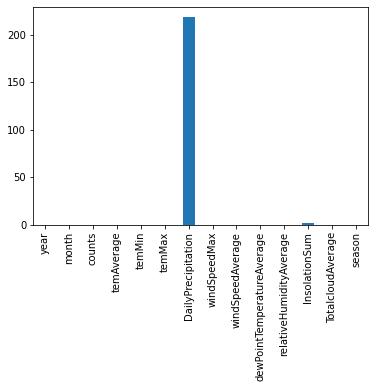

In [400]:
n=df_numeric.isnull().sum()
print(n)
n.plot.bar()

In [401]:
df_numeric['DailyPrecipitation'].describe()

count    147.000000
mean       6.602721
std       12.373563
min        0.000000
25%        0.000000
50%        1.200000
75%        7.500000
max       63.200000
Name: DailyPrecipitation, dtype: float64

In [403]:
df_numeric['InsolationSum'].describe()

count    363.000000
mean      13.928430
std        7.062214
min        0.750000
25%        8.915000
50%       13.150000
75%       19.850000
max       28.890000
Name: InsolationSum, dtype: float64

In [406]:
drop_column=['DailyPrecipitation']
df_numeric.drop(drop_column, axis=1, inplace=True)

In [407]:
n=df_numeric.isnull().sum()
n

year                          0
month                         0
counts                        0
temAverage                    0
temMin                        0
temMax                        0
windSpeedMax                  0
windSpeedAverage              0
dewPointTemperatureAverage    0
relativeHumidityAverage       0
InsolationSum                 2
TotalcloudAverage             0
season                        0
dtype: int64

In [445]:
df_numeric=df_numeric.fillna(13.928430)

In [446]:
n=df_numeric.isnull().sum()
n

year                          0
month                         0
counts                        0
temAverage                    0
temMin                        0
temMax                        0
windSpeedMax                  0
windSpeedAverage              0
dewPointTemperatureAverage    0
relativeHumidityAverage       0
InsolationSum                 0
TotalcloudAverage             0
season                        0
dtype: int64

<AxesSubplot:xlabel='month', ylabel='counts'>

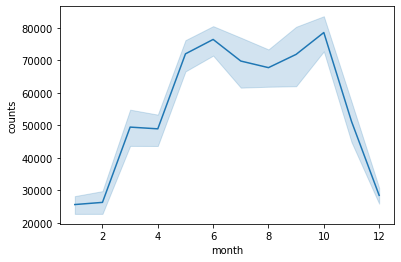

In [447]:
sns.lineplot(data=df_numeric, x="month", y="counts")

In [448]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [449]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df_numeric['counts']
X_features = df_numeric.drop(['counts'],axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.347, RMSE: 14641.372, MAE: 10836.180


In [450]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

     real_count  predicted_count     diff
101       16631          68567.0  51936.0
37        43351          93257.0  49906.0
30        49047          88105.0  39058.0
95        32229          64257.0  32028.0
27        12644          42002.0  29358.0


<AxesSubplot:>

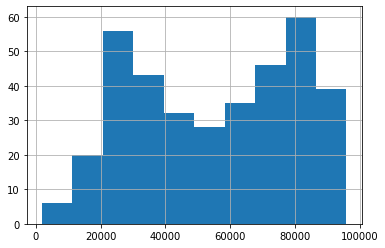

In [451]:
y_target.hist()

<AxesSubplot:>

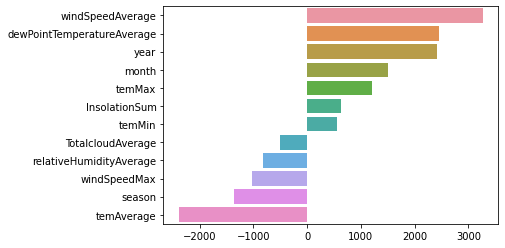

In [452]:
coef=pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [461]:
X_features_ohe = pd.get_dummies(X_features, columns=['month','season', 'year'])

In [462]:
X_train, X_test, y_train, y_test=train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.391, RMSE: 14047.840, MAE: 10377.359


<AxesSubplot:>

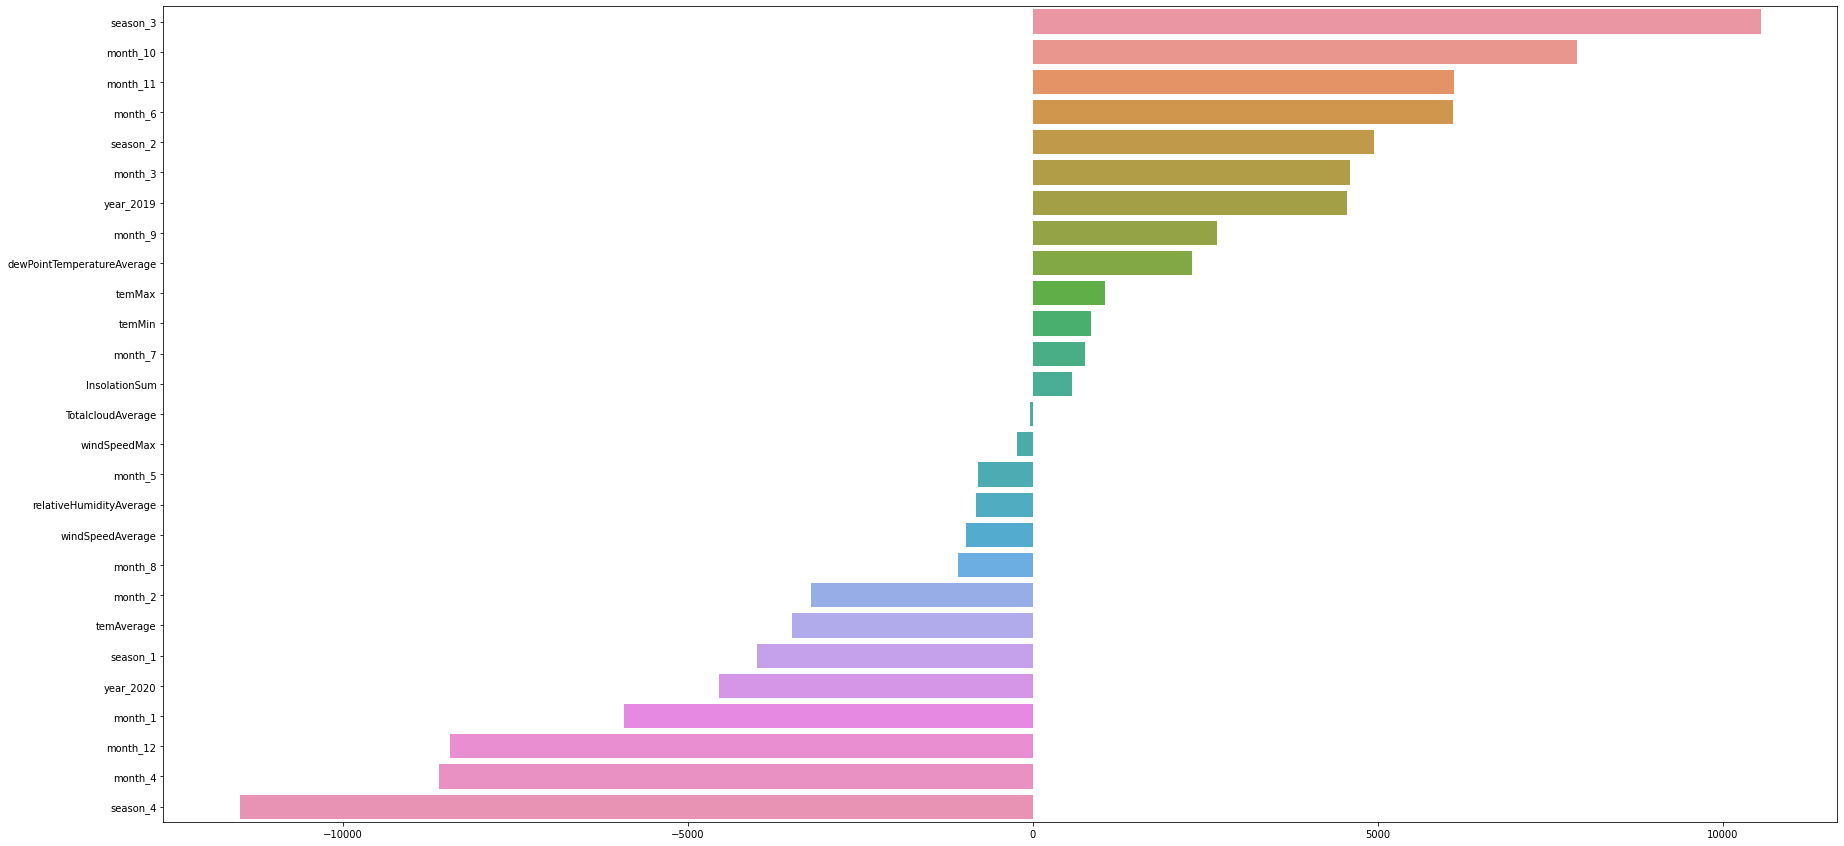

In [480]:
plt.subplots(figsize=(30,15))
coef=pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [489]:
print(lr_reg.coef_.sort())

None


In [464]:
corr = df_numeric.corr(method = 'pearson')
corr

,year,month,counts,temAverage,temMin,temMax,windSpeedMax,windSpeedAverage,dewPointTemperatureAverage,relativeHumidityAverage,InsolationSum,TotalcloudAverage,season
year,1.000000,-0.752071,-0.502788,-0.599102,-0.582509,-0.591168,0.216942,0.231208,-0.563912,-0.191410,-0.168315,-0.132304,0.165679
month,-0.752071,1.000000,0.264593,0.239309,0.240223,0.221573,-0.141818,-0.076399,0.288756,0.225652,-0.159041,0.058631,0.266904
counts,-0.502788,0.264593,1.000000,0.690049,0.644776,0.719930,-0.139845,-0.158333,0.554774,-0.050111,0.527041,-0.094651,-0.392507
temAverage,-0.599102,0.239309,0.690049,1.000000,0.987227,0.987420,-0.236514,-0.270503,0.935466,0.304075,0.365494,0.285077,-0.502938
temMin,-0.582509,0.240223,0.644776,0.987227,1.000000,0.955060,-0.228596,-0.238371,0.959281,0.395199,0.264350,0.363853,-0.465047
temMax,-0.591168,0.221573,0.719930,0.987420,0.955060,1.000000,-0.242347,-0.294976,0.891400,0.214062,0.461004,0.188727,-0.522391
windSpeedMax,0.216942,-0.141818,-0.139845,-0.236514,-0.228596,-0.242347,1.000000,0.836521,-0.247991,-0.126303,-0.026526,-0.097804,-0.005879
windSpeedAverage,0.231208,-0.076399,-0.158333,-0.270503,-0.238371,-0.294976,0.836521,1.000000,-0.258665,-0.086439,-0.102106,-0.014572,0.098846
dewPointTemperatureAverage,-0.563912,0.288756,0.554774,0.935466,0.959281,0.891400,-0.247991,-0.258665,1.000000,0.615744,0.099368,0.460957,-0.363629
relativeHumidityAverage,-0.191410,0.225652,-0.050111,0.304075,0.395199,0.214062,-0.126303,-0.086439,0.615744,1.000000,-0.538966,0.626429,0.094201


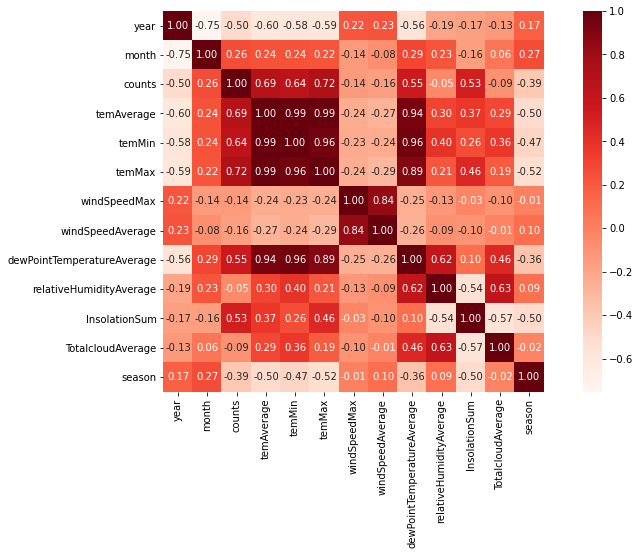

In [465]:
plt.subplots(figsize=(14,7))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Reds')

In [466]:
df_add = pd.get_dummies(df_numeric, columns=['month','season'])

In [467]:
corr_add = df_add.corr(method = 'pearson')
corr_add

,year,counts,temAverage,temMin,temMax,windSpeedMax,windSpeedAverage,dewPointTemperatureAverage,relativeHumidityAverage,InsolationSum,...,month_7,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4
year,1.000000,-0.502788,-0.599102,-0.582509,-0.591168,0.216942,0.231208,-0.563912,-0.191410,-0.168315,...,-0.175571,-0.175571,-0.169307,-0.175571,-0.172458,-0.175571,0.268056,-0.410857,-0.255606,0.401333
counts,-0.502788,1.000000,0.690049,0.644776,0.719930,-0.139845,-0.158333,0.554774,-0.050111,0.527041,...,0.174715,0.149785,0.192895,0.282644,-0.052458,-0.333390,-0.115320,0.456893,0.353357,-0.645564
temAverage,-0.599102,0.690049,1.000000,0.987227,0.987420,-0.236514,-0.270503,0.935466,0.304075,0.365494,...,0.370676,0.411515,0.260693,0.082596,-0.184064,-0.378173,-0.189252,0.713130,0.252355,-0.764737
temMin,-0.582509,0.644776,0.987227,1.000000,0.955060,-0.228596,-0.238371,0.959281,0.395199,0.264350,...,0.398607,0.426483,0.276672,0.071834,-0.190172,-0.369616,-0.221530,0.705648,0.255920,-0.734450
temMax,-0.591168,0.719930,0.987420,0.955060,1.000000,-0.242347,-0.294976,0.891400,0.214062,0.461004,...,0.339625,0.386569,0.237354,0.097376,-0.166916,-0.399152,-0.158493,0.701774,0.246442,-0.773057
windSpeedMax,0.216942,-0.139845,-0.236514,-0.228596,-0.242347,1.000000,0.836521,-0.247991,-0.126303,-0.026526,...,-0.120912,-0.155754,-0.029530,-0.011159,0.052297,-0.034678,0.179863,-0.194337,-0.029942,0.076159
windSpeedAverage,0.231208,-0.158333,-0.270503,-0.238371,-0.294976,0.836521,1.000000,-0.258665,-0.086439,-0.102106,...,-0.100905,-0.209440,0.066859,0.025231,0.060609,0.013498,0.101831,-0.262693,0.067766,0.129712
dewPointTemperatureAverage,-0.563912,0.554774,0.935466,0.959281,0.891400,-0.247991,-0.258665,1.000000,0.615744,0.099368,...,0.390440,0.426191,0.272796,0.101218,-0.161277,-0.308394,-0.275839,0.643819,0.275194,-0.644502
relativeHumidityAverage,-0.191410,-0.050111,0.304075,0.395199,0.214062,-0.126303,-0.086439,0.615744,1.000000,-0.538966,...,0.226975,0.215047,0.145643,0.075309,-0.023660,-0.005056,-0.272502,0.148623,0.162922,-0.061533
InsolationSum,-0.168315,0.527041,0.365494,0.264350,0.461004,-0.026526,-0.102106,0.099368,-0.538966,1.000000,...,-0.003353,0.078567,-0.047462,-0.035887,-0.180971,-0.289336,0.174353,0.407588,-0.061627,-0.498917


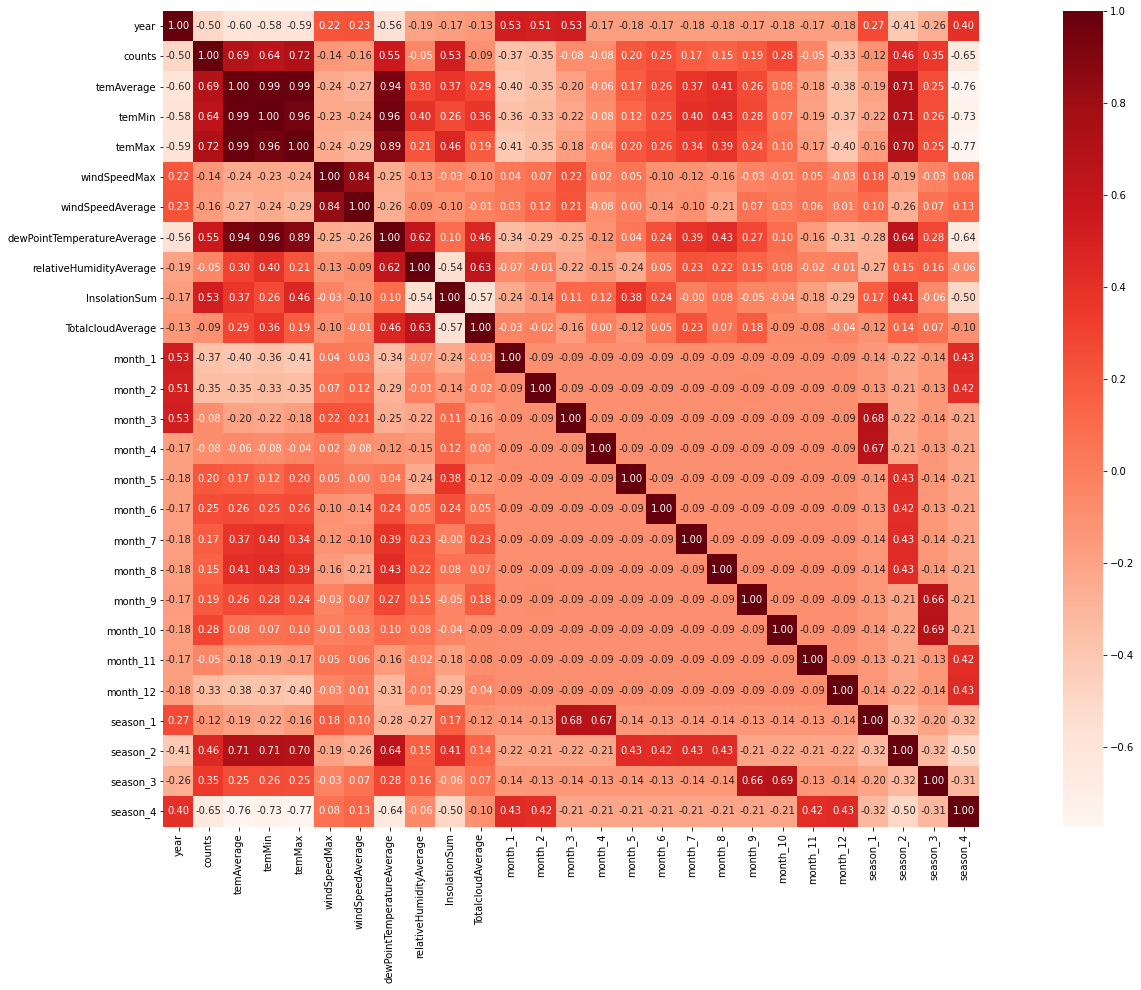

In [468]:
plt.subplots(figsize=(30,15))
df_heatmap = sns.heatmap(corr_add, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Reds')